In [1]:
# Dependency imports
import pandas as pd
import matplotlib.pyplot as plt
import os

# Log location
LOG_FOLDER = "logs"

# Simulation Analysis

### Baseline: One Agent - One Task

In [2]:
# Load one_worker_one_task.csv
df = pd.read_csv(os.path.join(LOG_FOLDER, "one_worker_one_task.csv"))
df = df[["RunId", "iteration", "Step", "Completed_Tasks", "Active_Tasks"]]

# Sum of completed tasks over all runs per step
df = df.groupby("Step").agg(
    Completed_Tasks_Sum=("Completed_Tasks", "sum"),
    Completed_Tasks_Mean=("Completed_Tasks", "mean"),
    Completed_Tasks_Std=("Completed_Tasks", "std"),
).reset_index()


<Figure size 1000x600 with 0 Axes>

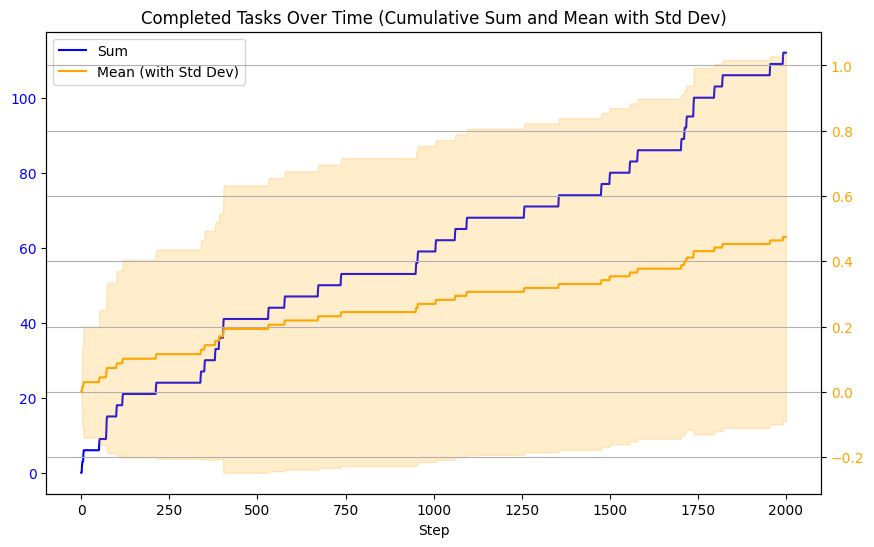

In [3]:
# Plotting
plt.figure(figsize=(10, 6))
# Create figure with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# First y-axis for Sum
ax1.plot(df["Step"], df["Completed_Tasks_Sum"], color='blue', label='Sum')
ax1.set_xlabel("Step")
ax1.tick_params(axis='y', labelcolor='blue')

# Second y-axis for Mean
ax2 = ax1.twinx()
ax2.plot(df["Step"], df["Completed_Tasks_Mean"], color='orange', label='Mean (with Std Dev)')
ax2.fill_between(df["Step"], 
                 df["Completed_Tasks_Mean"] - df["Completed_Tasks_Std"],
                 df["Completed_Tasks_Mean"] + df["Completed_Tasks_Std"], 
                 color='orange', alpha=0.2)
ax2.tick_params(axis='y', labelcolor='orange')

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
plt.title("Completed Tasks Over Time (Cumulative Sum and Mean with Std Dev)")
plt.xlabel("Step")
plt.grid()
plt.show()

<Figure size 1000x600 with 0 Axes>

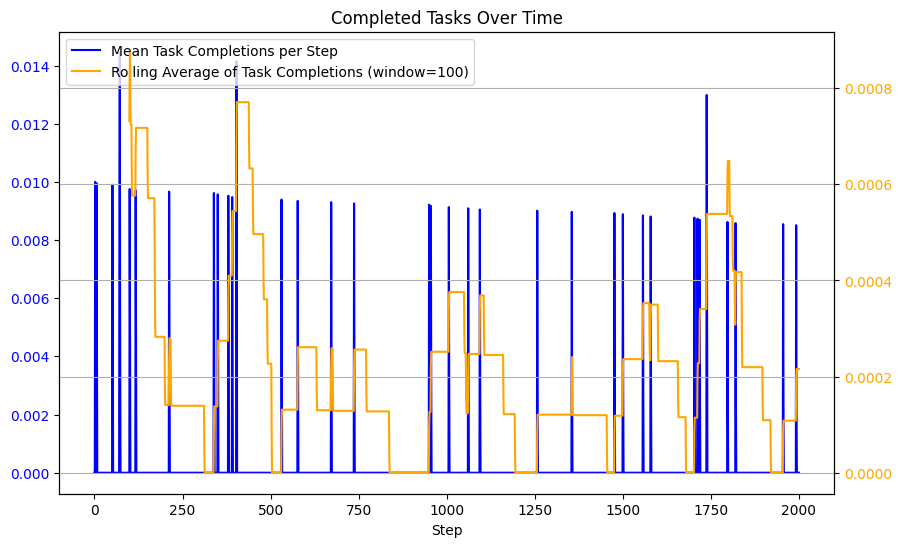

In [4]:
# Plot the average number of completed tasks per step with a rolling average
task_increment = df["Completed_Tasks_Mean"].diff().fillna(0)
rolling_mean_increment = task_increment.rolling(window=100).mean()

plt.figure(figsize=(10, 6))
# Create figure with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# First y-axis for absolute values
ax1.plot(df["Step"], task_increment, color='blue', label='Mean Task Completions per Step')
ax1.set_xlabel("Step")
ax1.tick_params(axis='y', labelcolor='blue')

# Second y-axis for rolling average
ax2 = ax1.twinx()
ax2.plot(df["Step"], rolling_mean_increment, color='orange', label='Rolling Average of Task Completions (window=100)')
ax2.tick_params(axis='y', labelcolor='orange')

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
plt.title("Completed Tasks Over Time")
plt.xlabel("Step")
plt.grid()
plt.show()

In [5]:
mean_increment = task_increment.mean()
print(f'Mean Completed Tasks per Step: {mean_increment}, Mean Time to complete a Task: {1 / mean_increment}, Total Completed Tasks: {df["Completed_Tasks_Mean"].iloc[-1]}')

Mean Completed Tasks per Step: 0.00023716955081781144, Mean Time to complete a Task: 4216.392857142857, Total Completed Tasks: 0.4745762711864407


### Comparison: Several Agents - One Task

In [2]:
# Load several_worker_one_task.csv
df = pd.read_csv(os.path.join(LOG_FOLDER, "several_worker_one_task.csv"))
df = df[["RunId", "iteration", "Step", "num_workers", "Completed_Tasks"]]


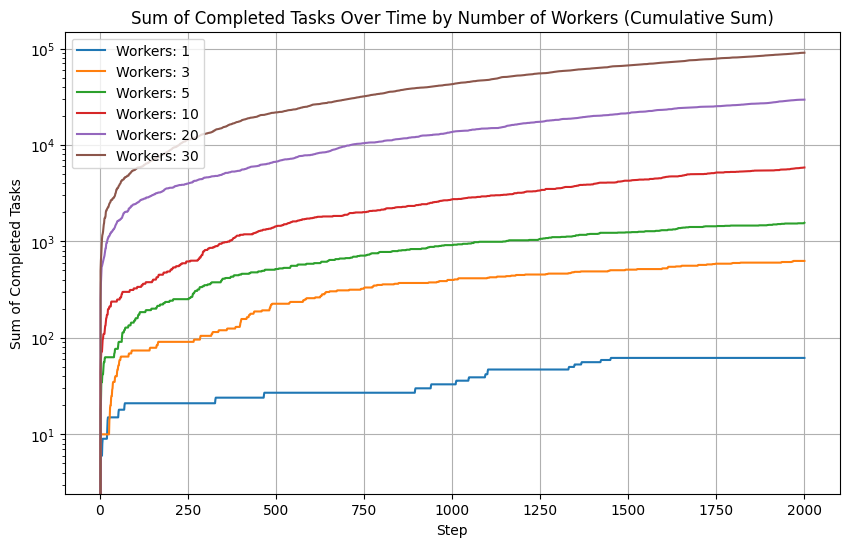

In [7]:
plt.figure(figsize=(10, 6))
for r in df['num_workers'].unique():
    df_worker = df[df['num_workers'] == r]
    subset = df_worker.groupby("Step").agg(
        Completed_Tasks_Sum=("Completed_Tasks", "sum")
    ).reset_index()
    plt.plot(subset["Step"], subset["Completed_Tasks_Sum"], label=f'Workers: {r}')

plt.title("Sum of Completed Tasks Over Time by Number of Workers (Cumulative Sum)")
plt.xlabel("Step")
plt.ylabel("Sum of Completed Tasks")
plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

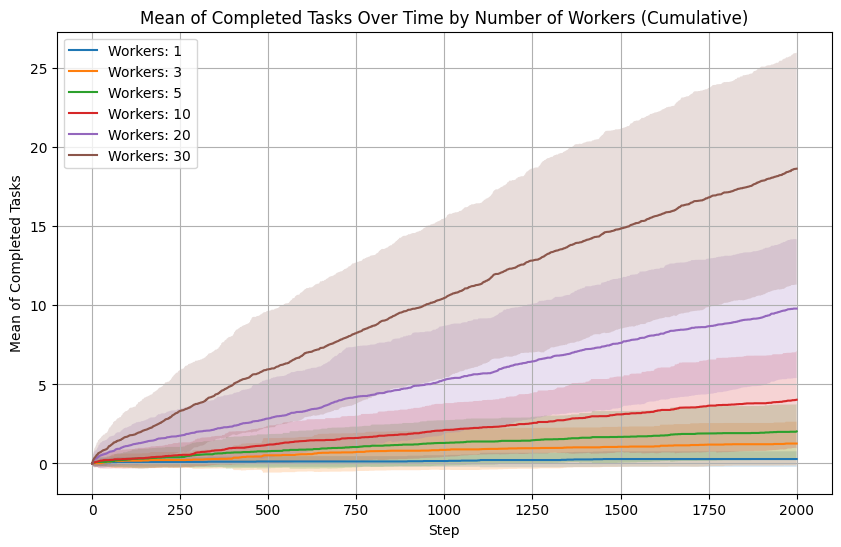

In [8]:
plt.figure(figsize=(10, 6))
for r in df['num_workers'].unique():
    df_worker = df[df['num_workers'] == r]
    subset = df_worker.groupby("Step").agg(
        Completed_Tasks_Mean=("Completed_Tasks", "mean"),
        Completed_Tasks_Std=("Completed_Tasks", "std"),
    ).reset_index()
    plt.plot(subset["Step"], subset["Completed_Tasks_Mean"], label=f'Workers: {r}')
    plt.fill_between(subset["Step"], subset["Completed_Tasks_Mean"] - subset["Completed_Tasks_Std"],
                     subset["Completed_Tasks_Mean"] + subset["Completed_Tasks_Std"], alpha=0.2)

plt.title("Mean of Completed Tasks Over Time by Number of Workers (Cumulative)")
plt.xlabel("Step")
plt.ylabel("Mean of Completed Tasks")
# plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

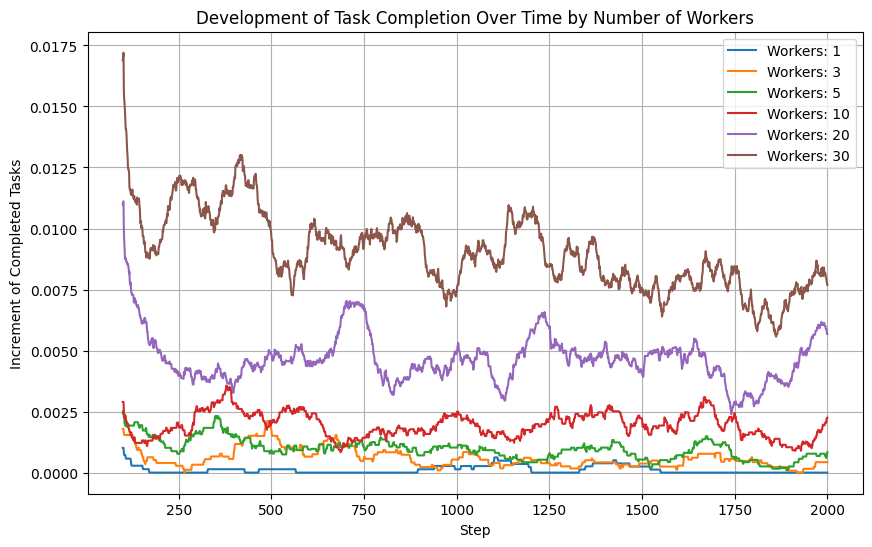

In [10]:
plt.figure(figsize=(10, 6))
for r in df['num_workers'].unique():
    df_worker = df[df['num_workers'] == r]
    subset = df_worker.groupby("Step").agg(
        Completed_Tasks_Mean=("Completed_Tasks", "mean"),
        Completed_Tasks_Std=("Completed_Tasks", "std"),
    ).reset_index()
    task_increment = subset["Completed_Tasks_Mean"].diff().fillna(0)
    rolling_mean_increment = task_increment.rolling(window=100).mean()

    plt.plot(subset["Step"], rolling_mean_increment, label=f'Workers: {r}')

plt.title("Development of Task Completion Over Time by Number of Workers")
plt.xlabel("Step")
plt.ylabel("Increment of Completed Tasks")
# plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

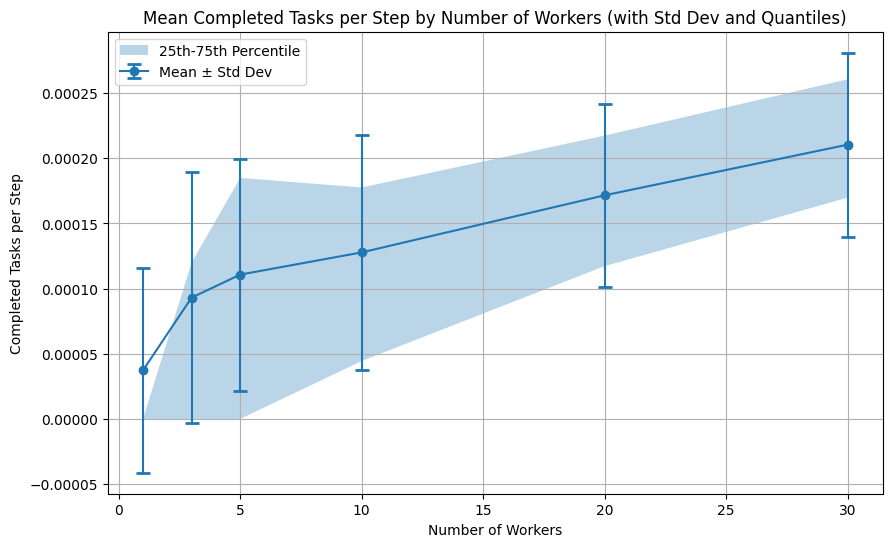

[{'num_workers': np.int64(1), 'mean': np.float64(3.734304126453216e-05), 'std': np.float64(7.857845496667122e-05), 'q25': np.float64(0.0), 'q75': np.float64(0.0)}, {'num_workers': np.int64(3), 'mean': np.float64(9.303823946564958e-05), 'std': np.float64(9.626969229599285e-05), 'q25': np.float64(0.0), 'q75': np.float64(0.00011990759476302422)}, {'num_workers': np.int64(5), 'mean': np.float64(0.00011072458621964392), 'std': np.float64(8.892008940493765e-05), 'q25': np.float64(0.0), 'q75': np.float64(0.00018489129945528654)}, {'num_workers': np.int64(10), 'mean': np.float64(0.0001277416295420741), 'std': np.float64(9.028445521875157e-05), 'q25': np.float64(4.442336805216662e-05), 'q75': np.float64(0.00017756354648110074)}, {'num_workers': np.int64(20), 'mean': np.float64(0.00017154386610656355), 'std': np.float64(7.02037424934123e-05), 'q25': np.float64(0.00011723094560252139), 'q75': np.float64(0.00021732814591871383)}, {'num_workers': np.int64(30), 'mean': np.float64(0.00021036381074726

In [ ]:
# Calculate statistics for each num_workers group
stats_by_workers = []
for w in sorted(df['num_workers'].unique()):
    df_worker = df[df['num_workers'] == w]
    
    # Calculate increment for each run separately
    run_means = []
    for run_id in df_worker['RunId'].unique():
        run_data = df_worker[df_worker['RunId'] == run_id].sort_values('Step')
        increments = run_data['Completed_Tasks'].diff().fillna(0)
        run_means.append(increments.mean())
    
    # Now calculate statistics across runs
    run_means = pd.Series(run_means)
    stats_by_workers.append({
        'num_workers': w,
        'mean': run_means.mean(),
        'std': run_means.std(),
        'q25': run_means.quantile(0.25),
        'median': run_means.quantile(0.50),
        'q75': run_means.quantile(0.75)
    })

stats_df = pd.DataFrame(stats_by_workers)

# Plot mean with error bars and quantiles
plt.figure(figsize=(10, 6))
plt.errorbar(stats_df['num_workers'], stats_df['mean'], yerr=stats_df['std'], 
             fmt='o-', capsize=5, capthick=2, label='Mean ± Std Dev')
plt.fill_between(stats_df['num_workers'], stats_df['q25'], stats_df['q75'], 
                 alpha=0.3, label='25th-75th Percentile')

plt.xlabel("Number of Workers")
plt.ylabel("Completed Tasks per Step")
plt.title("Mean Completed Tasks per Step by Number of Workers (with Std Dev and Quantiles)")
plt.legend()
plt.grid()
plt.show()

In [17]:
for r in df['num_workers'].unique():
    df_worker = df[df['num_workers'] == r]
    subset = df_worker.groupby("Step").agg(
        Completed_Tasks_Mean=("Completed_Tasks", "mean"),
    ).reset_index()
    task_increment = subset["Completed_Tasks_Mean"].diff().fillna(0)
    mean_increment = task_increment.mean()
    print(f'Workers: {r}, Mean Completed Tasks per Step: {mean_increment}, Mean Time to complete a Task: {1 / mean_increment}, Total Completed Tasks: {subset["Completed_Tasks_Mean"].iloc[-1]}')

Workers: 1, Mean Completed Tasks per Step: 0.00014083867157330425, Mean Time to complete a Task: 7100.322580645162, Total Completed Tasks: 0.2818181818181818
Workers: 3, Mean Completed Tasks per Step: 0.0006302069848609831, Mean Time to complete a Task: 1586.78025477707, Total Completed Tasks: 1.2610441767068272
Workers: 5, Mean Completed Tasks per Step: 0.0010137788248732777, Mean Time to complete a Task: 986.4084507042253, Total Completed Tasks: 2.0285714285714285
Workers: 10, Mean Completed Tasks per Step: 0.002014854641644695, Mean Time to complete a Task: 496.31371878207324, Total Completed Tasks: 4.031724137931034
Workers: 20, Mean Completed Tasks per Step: 0.004892779074653655, Mean Time to complete a Task: 204.38282308317528, Total Completed Tasks: 9.790450928381963
Workers: 30, Mean Completed Tasks per Step: 0.00931323508515456, Mean Time to complete a Task: 107.37407472877125, Total Completed Tasks: 18.635783405394275


### Comparison: Several Agents - One Task (larger task requirement)

In [42]:
# Load several_worker_one_task_long.csv
df = pd.read_csv(os.path.join(LOG_FOLDER, "several_worker_one_task_long.csv"))
df = df[["RunId", "iteration", "Step", "task_workers", "num_workers", "Completed_Tasks"]]

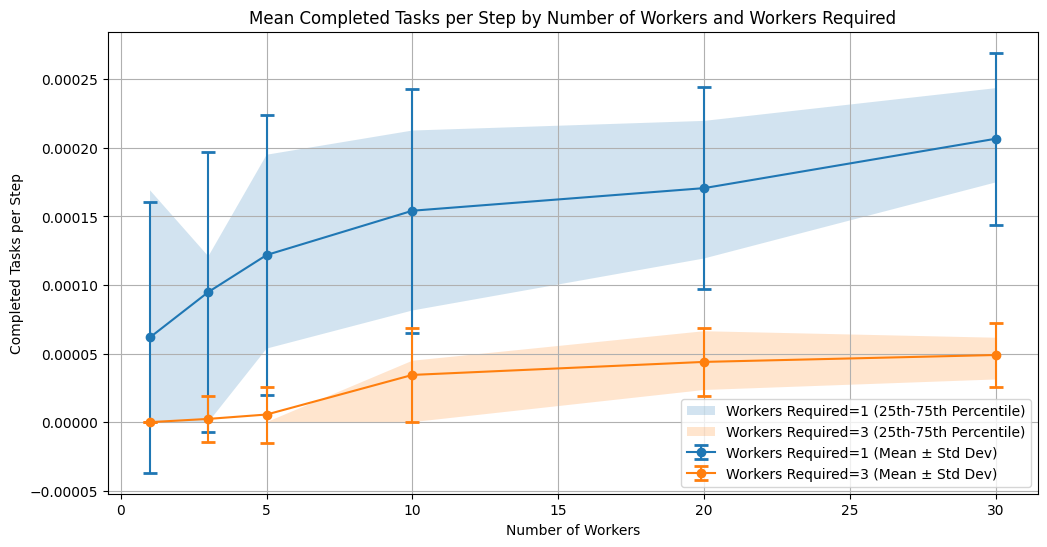

In [44]:
# Calculate statistics for each (num_workers, task_time) combination
stats_by_workers_and_time = []
for t in sorted(df['task_workers'].unique()):
    for w in sorted(df['num_workers'].unique()):
        df_subset = df[(df['num_workers'] == w) & (df['task_workers'] == t)]
        
        # Calculate increment for each run separately
        run_means = []
        for run_id in df_subset['RunId'].unique():
            run_data = df_subset[df_subset['RunId'] == run_id].sort_values('Step')
            increments = run_data['Completed_Tasks'].diff().fillna(0)
            run_means.append(increments.mean())
        
        # Now calculate statistics across runs
        run_means = pd.Series(run_means)
        stats_by_workers_and_time.append({
            'num_workers': w,
            'task_workers': t,
            'mean': run_means.mean(),
            'std': run_means.std(),
            'q25': run_means.quantile(0.25),
            'q75': run_means.quantile(0.75)
        })

stats_df = pd.DataFrame(stats_by_workers_and_time)

# Plot with separate lines for each task_time
plt.figure(figsize=(12, 6))

for t in sorted(df['task_workers'].unique()):
    df_task = stats_df[stats_df['task_workers'] == t]
    
    # Plot mean with error bars
    plt.errorbar(df_task['num_workers'], df_task['mean'], yerr=df_task['std'], 
                 fmt='o-', capsize=5, capthick=2, label=f'Workers Required={t} (Mean ± Std Dev)')
    
    # Plot quantile band
    plt.fill_between(df_task['num_workers'], df_task['q25'], df_task['q75'], 
                     alpha=0.2, label=f'Workers Required={t} (25th-75th Percentile)')

plt.xlabel("Number of Workers")
plt.ylabel("Completed Tasks per Step")
plt.title("Mean Completed Tasks per Step by Number of Workers and Workers Required")
plt.legend()
plt.grid()
plt.show()

### Several Workers - Several Task (Benchmark)

In [26]:
# Load several_worker_several_task.csv
df = pd.read_csv(os.path.join(LOG_FOLDER, "several_worker_several_task.csv"))
df = df[["RunId", "iteration", "Step", "num_workers", "num_tasks", "Completed_Tasks"]]


In [ ]:
# Calculate mean task completion rate for each (num_workers, num_tasks) combination
stats_by_comm_range = []
for w in sorted(df['num_workers'].unique()):
    for t in sorted(df['num_tasks'].unique()):
        df_subset = df[(df['num_workers'] == w) & (df['num_tasks'] == t)]
        
        # Calculate increment for each run separately
        run_means = []
        for run_id in df_subset['RunId'].unique():
            run_data = df_subset[df_subset['RunId'] == run_id].sort_values('Step')
            increments = run_data['Completed_Tasks'].diff().fillna(0)
            run_means.append(increments.mean())
        
        # Calculate statistics across runs
        run_means = pd.Series(run_means)
        stats_by_comm_range.append({
            'num_workers': w,
            'num_tasks': t,
            'mean': run_means.mean(),
            'std': run_means.std(),
            'q25': run_means.quantile(0.25),
            'q75': run_means.quantile(0.75)
        })

stats_df = pd.DataFrame(stats_by_comm_range)


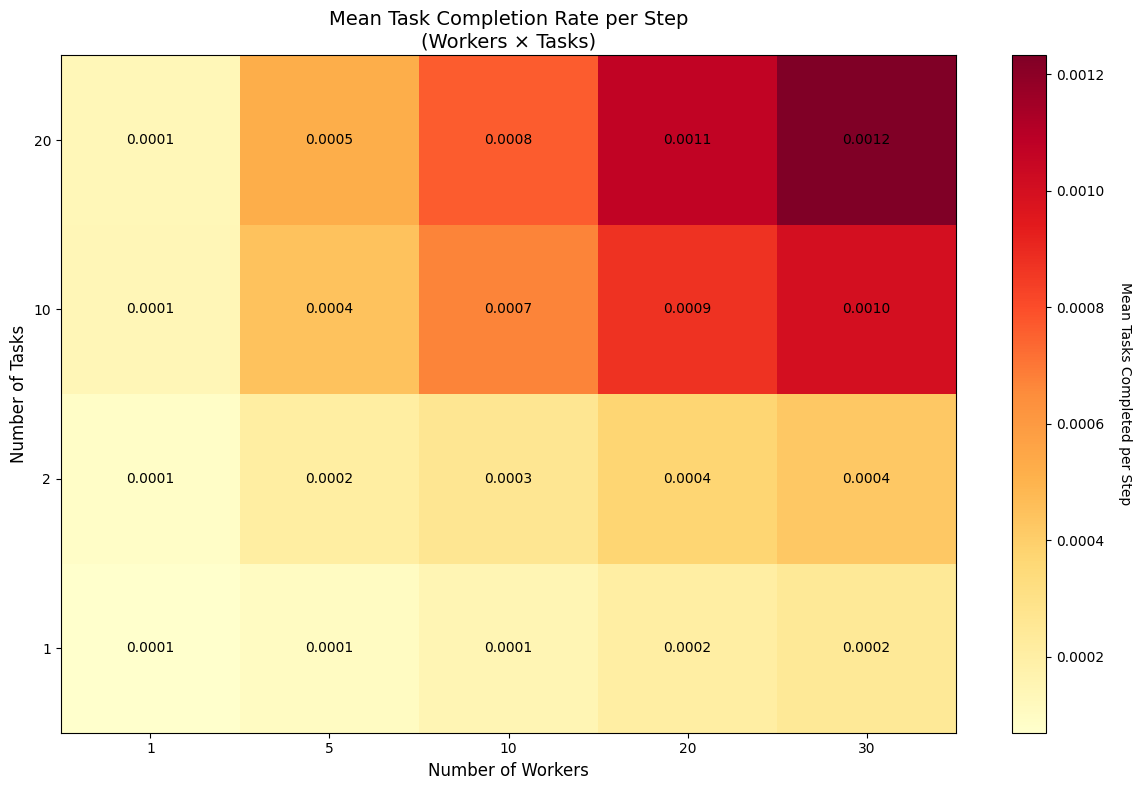

In [32]:
# Create pivot table for heatmap
pivot_table = stats_df.pivot(index='num_tasks', columns='num_workers', values='mean')

# Plot heatmap
plt.figure(figsize=(12, 8))
im = plt.imshow(pivot_table, cmap='YlOrRd', aspect='auto', origin='lower')

# Set ticks and labels
plt.xticks(range(len(pivot_table.columns)), pivot_table.columns)
plt.yticks(range(len(pivot_table.index)), pivot_table.index)
plt.xlabel('Number of Workers', fontsize=12)
plt.ylabel('Number of Tasks', fontsize=12)
plt.title('Mean Task Completion Rate per Step\n(Workers × Tasks)', fontsize=14)

# Add colorbar
cbar = plt.colorbar(im)
cbar.set_label('Mean Tasks Completed per Step', rotation=270, labelpad=20)

# Add text annotations
for i in range(len(pivot_table.index)):
    for j in range(len(pivot_table.columns)):
        value = pivot_table.iloc[i, j]
        text = plt.text(j, i, f'{value:.4f}',
                       ha="center", va="center", color="black", fontsize=10)

plt.tight_layout()
plt.show()

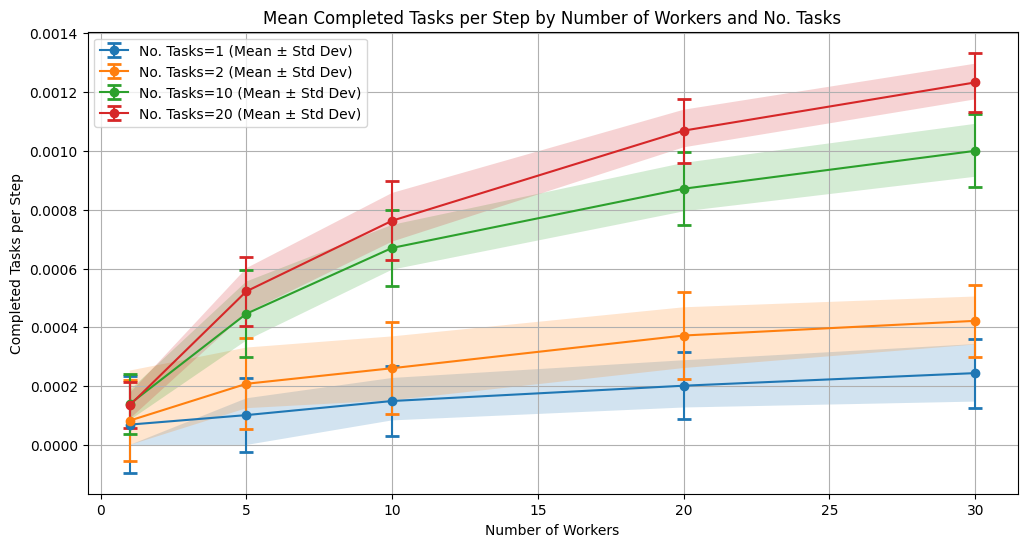

In [35]:
# Plot with separate lines for the largest num_tasks
plt.figure(figsize=(12, 6))

for t in sorted(df['num_tasks'].unique()):
    df_task = stats_df[stats_df['num_tasks'] == t]

    # Plot mean with error bars
    plt.errorbar(df_task['num_workers'], df_task['mean'], yerr=df_task['std'], 
                 fmt='o-', capsize=5, capthick=2, label=f'No. Tasks={t} (Mean ± Std Dev)')
    
    # Plot quantile band
    plt.fill_between(df_task['num_workers'], df_task['q25'], df_task['q75'], alpha=0.2)

plt.xlabel("Number of Workers")
plt.ylabel("Completed Tasks per Step")
plt.title("Mean Completed Tasks per Step by Number of Workers and No. Tasks")
plt.legend()
plt.grid()
plt.show()

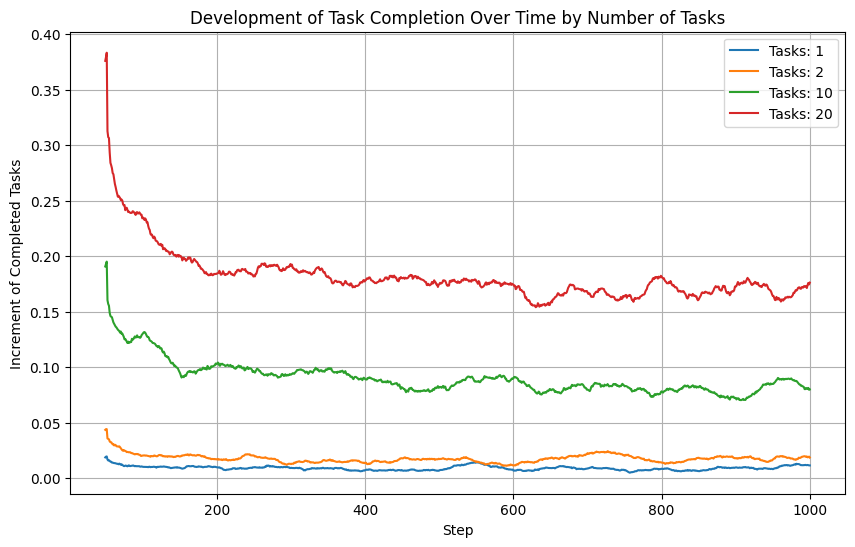

In [ ]:
plt.figure(figsize=(10, 6))

# Calculate mean task completion rate for each (num_workers, num_tasks) combination
stats_by_comm_range = []
for t in sorted(df['num_tasks'].unique()):
    df_task = df[(df['num_workers'] == 30) & (df['num_tasks'] == t)]
    subset = df_task.groupby("Step").agg(
        Completed_Tasks_Mean=("Completed_Tasks", "mean")
    ).reset_index()
    task_increment = subset["Completed_Tasks_Mean"].diff().fillna(0)
    mean_increment = task_increment.mean()
    rolling_mean_increment = task_increment.rolling(window=50).mean()

    plt.plot(subset["Step"], rolling_mean_increment, label=f'Tasks: {t}')

plt.title("Development of Task Completion Over Time by Number of Tasks")
plt.xlabel("Step")
plt.ylabel("Increment of Completed Tasks")
# plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

### Call-Out-Protocol

In [52]:
# Load call_out_protocol.csv
df = pd.read_csv(os.path.join(LOG_FOLDER, "call_out_protocol.csv"))
df = df[["RunId", "iteration", "Step", "worker_comm_range", "Completed_Tasks"]]


In [53]:
# Calculate mean task completion rate for different worker_comm_range values
stats_by_comm_range = []
for c in sorted(df['worker_comm_range'].unique()):
    df_subset = df[(df['worker_comm_range'] == c)]
        
    # Calculate increment for each run separately
    run_means = []
    for run_id in df_subset['RunId'].unique():
        run_data = df_subset[df_subset['RunId'] == run_id].sort_values('Step')
        increments = run_data['Completed_Tasks'].diff().fillna(0)
        run_means.append(increments.mean())
        
    # Calculate statistics across runs
    run_means = pd.Series(run_means)
    stats_by_comm_range.append({
        'worker_comm_range': c,
        'mean': run_means.mean(),
        'std': run_means.std(),
        'q25': run_means.quantile(0.25),
        'median': run_means.quantile(0.50),
        'q75': run_means.quantile(0.75)
    })

stats_df = pd.DataFrame(stats_by_comm_range)


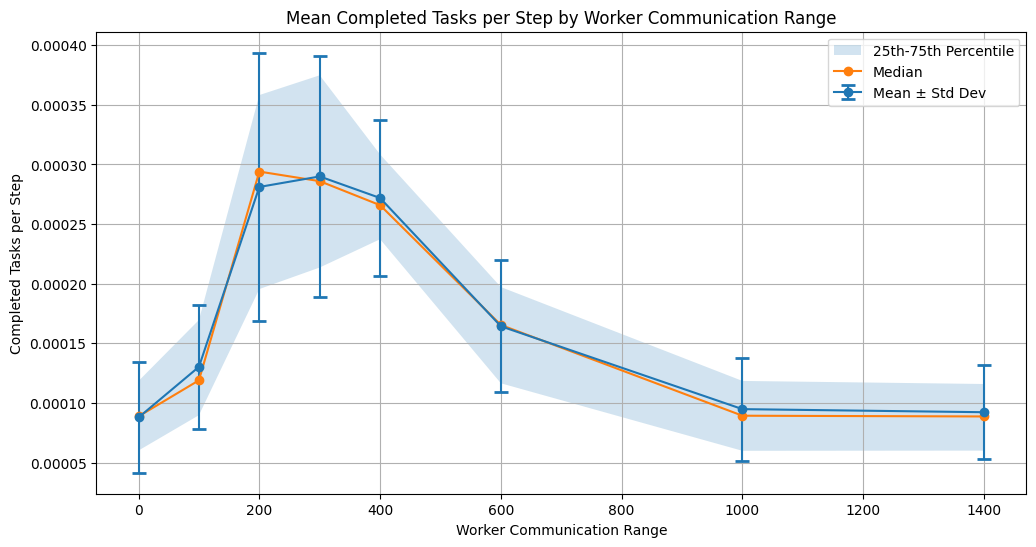

In [60]:
# Plot with separate lines for the largest num_tasks
plt.figure(figsize=(12, 6))

# Plot mean with error bars
plt.errorbar(stats_df['worker_comm_range'], stats_df['mean'], yerr=stats_df['std'], 
                fmt='o-', capsize=5, capthick=2, label='Mean ± Std Dev')

# Plot quantile band
plt.fill_between(stats_df['worker_comm_range'], stats_df['q25'], stats_df['q75'], alpha=0.2, label='25th-75th Percentile')
plt.plot(stats_df['worker_comm_range'], stats_df['median'], 'o-', label='Median')

plt.xlabel("Worker Communication Range")
plt.ylabel("Completed Tasks per Step")
plt.title("Mean Completed Tasks per Step by Worker Communication Range")
plt.legend()
plt.grid()
plt.show()

### Call-Off Protocol

In [56]:
# Load call_off_protocol.csv
df = pd.read_csv(os.path.join(LOG_FOLDER, "call_off_protocol.csv"))
df = df[["RunId", "iteration", "Step", "use_call_off", "worker_comm_range", "Completed_Tasks"]]


In [61]:
# Calculate mean task completion rate for different worker_comm_range values
stats_by_comm_range = []
for c in sorted(df['worker_comm_range'].unique()):
    for use_call_off in [False, True]:
        df_subset = df[(df['worker_comm_range'] == c) & (df['use_call_off'] == use_call_off)]
        
        # Calculate increment for each run separately
        run_means = []
        for run_id in df_subset['RunId'].unique():
            run_data = df_subset[df_subset['RunId'] == run_id].sort_values('Step')
            increments = run_data['Completed_Tasks'].diff().fillna(0)
            run_means.append(increments.mean())
        
        # Calculate statistics across runs
        run_means = pd.Series(run_means)
        stats_by_comm_range.append({
            'worker_comm_range': c,
            'use_call_off': use_call_off,
            'mean': run_means.mean(),
            'std': run_means.std(),
            'q25': run_means.quantile(0.25),
            'median': run_means.quantile(0.50),
            'q75': run_means.quantile(0.75)
        })
        
stats_df = pd.DataFrame(stats_by_comm_range)


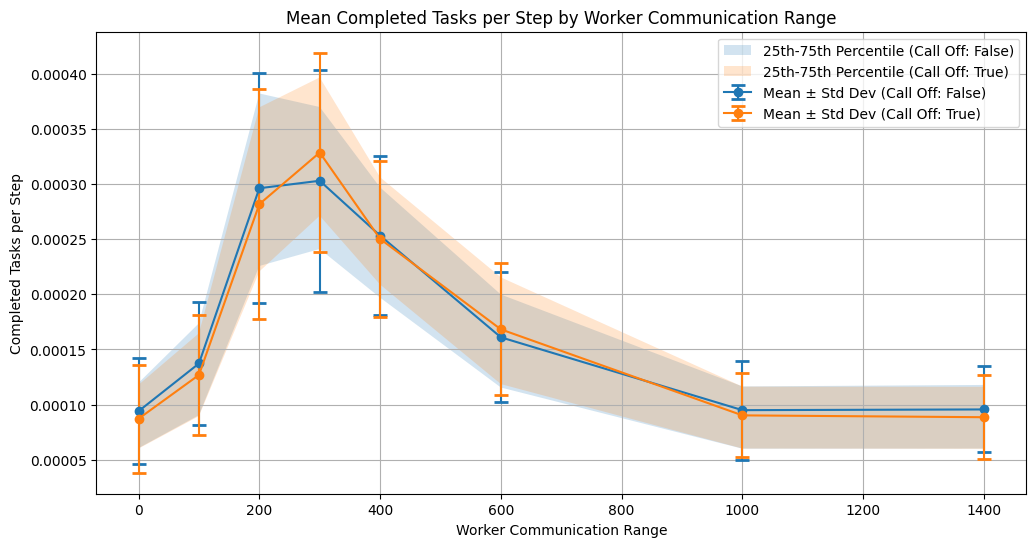

In [63]:
# Plot with separate lines for the largest num_tasks
plt.figure(figsize=(12, 6))

# Plot mean with error bars
for use_call_off in [False, True]:
    stats_subset = stats_df[stats_df['use_call_off'] == use_call_off]
    plt.errorbar(stats_subset['worker_comm_range'], stats_subset['mean'], yerr=stats_subset['std'], 
                    fmt='o-', capsize=5, capthick=2, label=f'Mean ± Std Dev (Call Off: {use_call_off})')

    # Plot quantile band
    plt.fill_between(stats_subset['worker_comm_range'], stats_subset['q25'], stats_subset['q75'], alpha=0.2, label=f'25th-75th Percentile (Call Off: {use_call_off})')

plt.xlabel("Worker Communication Range")
plt.ylabel("Completed Tasks per Step")
plt.title("Mean Completed Tasks per Step by Worker Communication Range")
plt.legend()
plt.grid()
plt.show()

### Auction-Model

In [64]:
# Load game_model_auction.csv
df = pd.read_csv(os.path.join(LOG_FOLDER, "game_model_auction.csv"))
df = df[["RunId", "iteration", "Step", "worker_comm_range", "Completed_Tasks"]]


In [65]:
# Calculate mean task completion rate for different worker_comm_range values
stats_by_comm_range = []
for c in sorted(df['worker_comm_range'].unique()):
    df_subset = df[df['worker_comm_range'] == c]
        
    # Calculate increment for each run separately
    run_means = []
    for run_id in df_subset['RunId'].unique():
        run_data = df_subset[df_subset['RunId'] == run_id].sort_values('Step')
        increments = run_data['Completed_Tasks'].diff().fillna(0)
        run_means.append(increments.mean())
        
    # Calculate statistics across runs
    run_means = pd.Series(run_means)
    stats_by_comm_range.append({
        'worker_comm_range': c,
        'mean': run_means.mean(),
        'std': run_means.std(),
        'q25': run_means.quantile(0.25),
        'median': run_means.quantile(0.50),
        'q75': run_means.quantile(0.75)
    })
        
stats_df = pd.DataFrame(stats_by_comm_range)


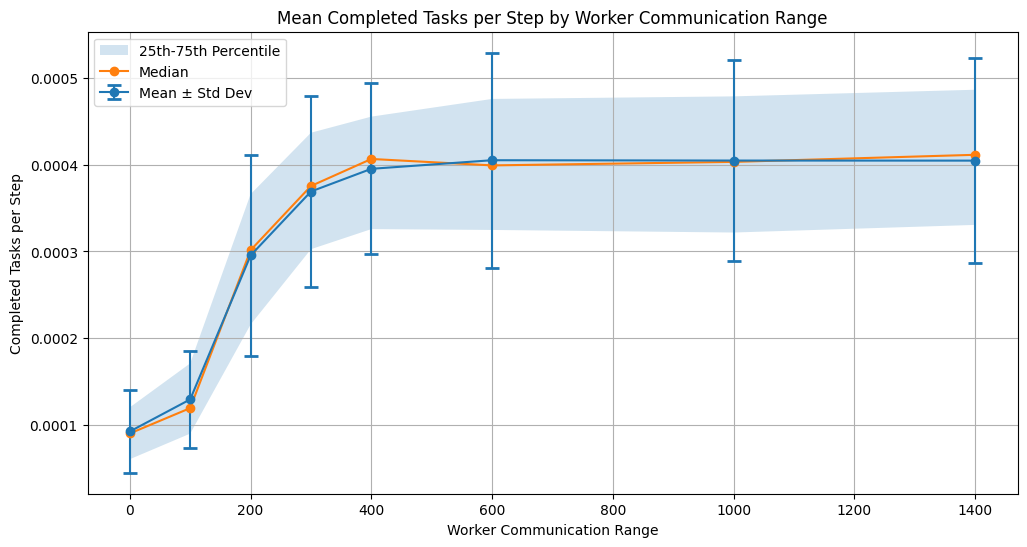

In [66]:
# Plot with separate lines for the largest num_tasks
plt.figure(figsize=(12, 6))

# Plot mean with error bars
plt.errorbar(stats_df['worker_comm_range'], stats_df['mean'], yerr=stats_df['std'], 
                fmt='o-', capsize=5, capthick=2, label='Mean ± Std Dev')

# Plot quantile band
plt.fill_between(stats_df['worker_comm_range'], stats_df['q25'], stats_df['q75'], alpha=0.2, label='25th-75th Percentile')
plt.plot(stats_df['worker_comm_range'], stats_df['median'], 'o-', label='Median')

plt.xlabel("Worker Communication Range")
plt.ylabel("Completed Tasks per Step")
plt.title("Mean Completed Tasks per Step by Worker Communication Range")
plt.legend()
plt.grid()
plt.show()

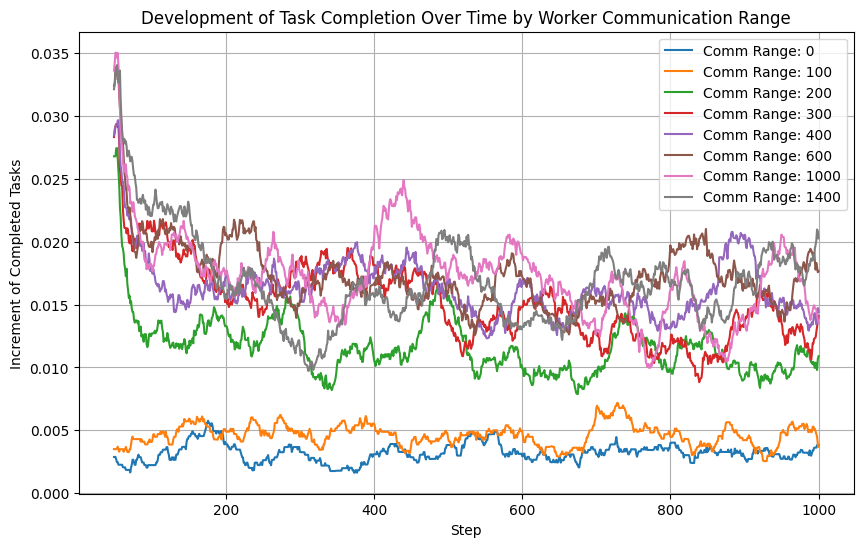

In [69]:
plt.figure(figsize=(10, 6))

# Calculate mean task completion rate for each (num_workers, num_tasks) combination
stats_by_comm_range = []
for c in sorted(df['worker_comm_range'].unique()):
    df_subset = df[df['worker_comm_range'] == c]

    subset = df_subset.groupby("Step").agg(
        Completed_Tasks_Mean=("Completed_Tasks", "mean")
    ).reset_index()
    task_increment = subset["Completed_Tasks_Mean"].diff().fillna(0)
    mean_increment = task_increment.mean()
    rolling_mean_increment = task_increment.rolling(window=50).mean()

    plt.plot(subset["Step"], rolling_mean_increment, label=f'Comm Range: {c}')

plt.title("Development of Task Completion Over Time by Worker Communication Range")
plt.xlabel("Step")
plt.ylabel("Increment of Completed Tasks")
# plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

In [70]:
# Merge the call_off_protocol.csv and game_model_auction.csv data for comparison

df_call_off = pd.read_csv(os.path.join(LOG_FOLDER, "call_off_protocol.csv"))
df_call_off = df_call_off[["RunId", "iteration", "Step", "use_call_off", "worker_comm_range", "Completed_Tasks"]]

# Add auction flag to both dataframes & only take the call_off = True rows
df_call_off = df_call_off[df_call_off['use_call_off'] == True].copy()
df_call_off['auction_mode'] = False
df['auction_mode'] = True

merged_df = pd.concat([df_call_off, df], ignore_index=True)

In [71]:
# Calculate mean task completion rate for different worker_comm_range values
stats = []
for auction_mode in [False, True]:
    for c in sorted(merged_df['worker_comm_range'].unique()):
        df_subset = merged_df[(merged_df['worker_comm_range'] == c) & (merged_df['auction_mode'] == auction_mode)]

        # Calculate increment for each run separately
        run_means = []
        for run_id in df_subset['RunId'].unique():
            run_data = df_subset[df_subset['RunId'] == run_id].sort_values('Step')
            increments = run_data['Completed_Tasks'].diff().fillna(0)
            run_means.append(increments.mean())
            
        # Calculate statistics across runs
        run_means = pd.Series(run_means)
        stats.append({
            'worker_comm_range': c,
            'auction_mode': auction_mode,
            'mean': run_means.mean(),
            'std': run_means.std(),
            'q25': run_means.quantile(0.25),
            'median': run_means.quantile(0.50),
            'q75': run_means.quantile(0.75)
        })
        
stats_df = pd.DataFrame(stats)


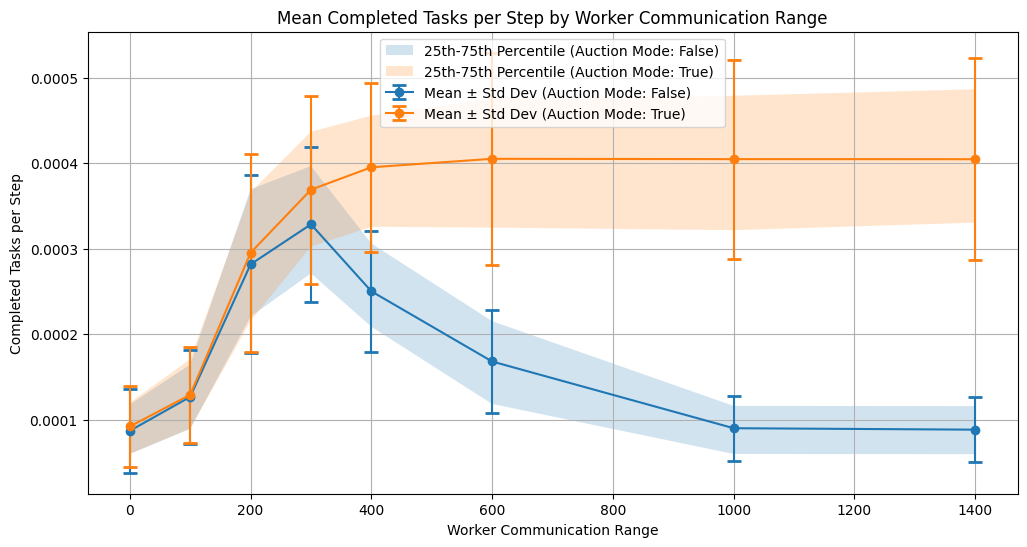

In [72]:
# Plot with separate lines for the largest num_tasks
plt.figure(figsize=(12, 6))

for auction_mode in [False, True]:
    stats_subset = stats_df[stats_df['auction_mode'] == auction_mode]
    plt.errorbar(stats_subset['worker_comm_range'], stats_subset['mean'], yerr=stats_subset['std'], 
                    fmt='o-', capsize=5, capthick=2, label=f'Mean ± Std Dev (Auction Mode: {auction_mode})')

    # Plot quantile band
    plt.fill_between(stats_subset['worker_comm_range'], stats_subset['q25'], stats_subset['q75'], alpha=0.2, label=f'25th-75th Percentile (Auction Mode: {auction_mode})')

plt.xlabel("Worker Communication Range")
plt.ylabel("Completed Tasks per Step")
plt.title("Mean Completed Tasks per Step by Worker Communication Range")
plt.legend()
plt.grid()
plt.show()

In [74]:
# Calculate mean task completion rate for auction vs non-auction

for auction_mode in [False, True]:
    stats_subset = stats_df[stats_df['auction_mode'] == auction_mode]
    
    total_mean = stats_subset['mean'].mean()
    print(f'Auction Mode: {auction_mode}, Total Mean Completed Tasks per Step: {total_mean:.4f}')
    if auction_mode:
        stats_subset = stats_subset[stats_subset['worker_comm_range'] > 400]
    else:
        stats_subset = stats_subset[stats_subset['worker_comm_range'] == 300]
    total_mean_specific = stats_subset['mean'].mean()
    print(f'Auction Mode: {auction_mode}, Specific Comm Range Mean Completed Tasks per Step: {total_mean_specific:.4f}')

Auction Mode: False, Total Mean Completed Tasks per Step: 0.0002
Auction Mode: False, Specific Comm Range Mean Completed Tasks per Step: 0.0003
Auction Mode: True, Total Mean Completed Tasks per Step: 0.0003
Auction Mode: True, Specific Comm Range Mean Completed Tasks per Step: 0.0004


In [78]:
for auction_mode in [False, True]:
    subset = merged_df[(merged_df['auction_mode'] == auction_mode) & (merged_df["Step"] == 1000)]
    total_tasks_completed = subset['Completed_Tasks'].mean()
    print(f'Auction Mode: {auction_mode}, Average Total Completed Tasks at Step 1000: {total_tasks_completed}')
    
    if auction_mode:
        subset = subset[subset['worker_comm_range'] > 400]
    else:
        subset = subset[subset['worker_comm_range'] == 300]
    total_mean_specific = subset['Completed_Tasks'].mean()
    print(f'Auction Mode: {auction_mode}, Specific Average Total Completed Tasks at Step 1000: {total_mean_specific:.4f}')

Auction Mode: False, Average Total Completed Tasks at Step 1000: 7.182071287513354
Auction Mode: False, Specific Average Total Completed Tasks at Step 1000: 13.3575
Auction Mode: True, Average Total Completed Tasks at Step 1000: 13.886989367655287
Auction Mode: True, Specific Average Total Completed Tasks at Step 1000: 17.7012
